In [1]:
import xarray
import pygmt
import pandas
import numpy as np

In [2]:
ds = xarray.open_dataset("../data/MIROC_outputs/ctrl_MIROC-COSP2.nc")

In [3]:
%%capture

vname='cltcalipso'
var=ds[vname].values

lat=ds["latitude"].values
lon=ds["longitude"].values

In [4]:
vmin=0.
vmax=100.
mask = (var >= vmin) & (var <= vmax)

data = np.column_stack([lon[mask], lat[mask], var[mask]])

In [5]:
check_rows = np.isfinite(data).all(axis=1)
Nerror = np.where(~check_rows)[0]

if Nerror.size > 0:
    raise ValueError("NaN または Inf を含むデータが検出されました。処理を中止します。")

if data.size == 0:
    raise RuntimeError("maskの結果、有効なポイントがありません。vmin/vmaxや元データを確認してください。")

In [6]:
fig = pygmt.Figure()
region = [-180, 180, -75, 75]

In [7]:
tbl_block = pygmt.blockmean(
    data=data,
    region=region,
    spacing="1.5d"
)

grid = pygmt.surface(
    data=tbl_block,
    region=region,
    spacing="1.5d"
)

In [8]:
gxyz = pygmt.xyz2grd(
    data=data,
    region=region,
    spacing="1.5d",
)

In [9]:
fig.coast(
    region=region,
    projection="W15c",
    frame="afg",
    land="lightgray",
    water="white"
)


In [10]:
fig.grdimage(
    grid=gxyz,
    cmap="viridis"
)

In [11]:
fig.colorbar(frame='af+l"Total Cloud Cover (%)"')

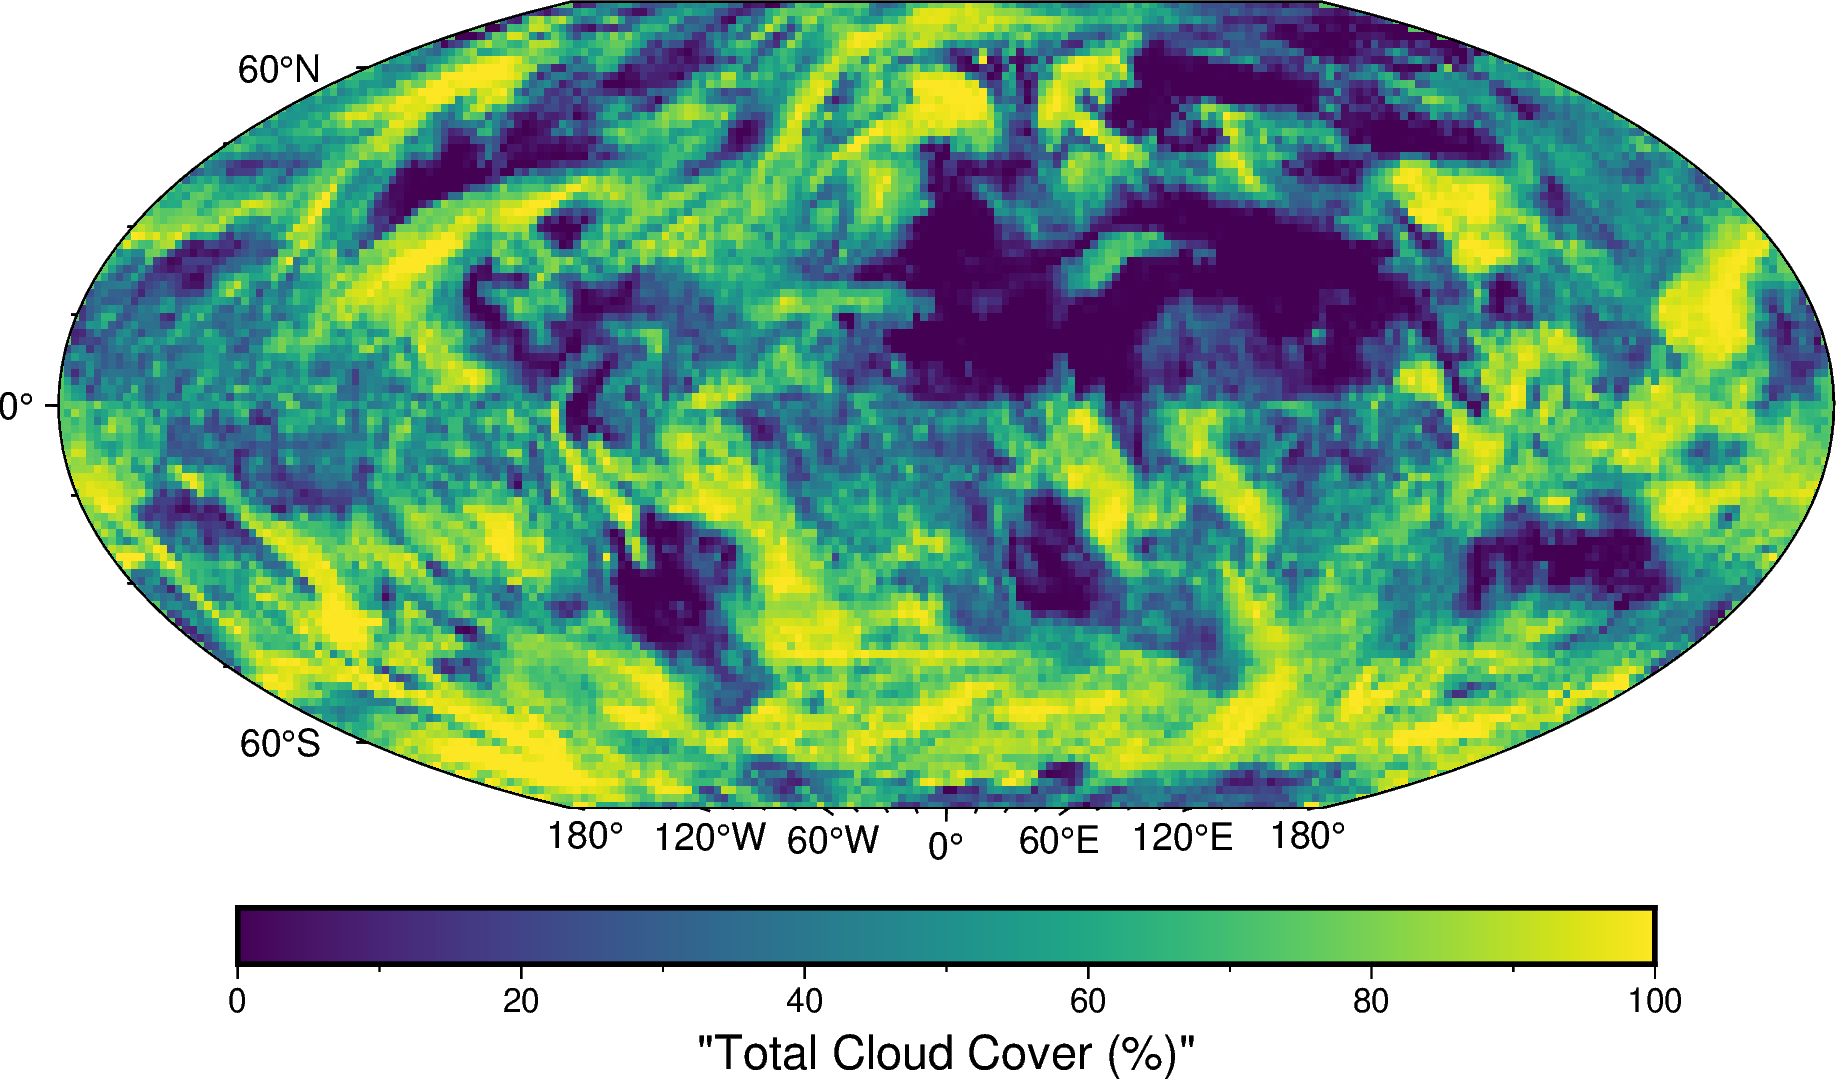

In [12]:
fig.show(width="80%")